<a href="https://colab.research.google.com/github/apchavezr/Analistica_de_negocios/blob/main/Segmentacion_RFM_KMeans_Explicado.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Segmentación de clientes con RFM y K-means

Este cuaderno presenta una guía paso a paso para segmentar clientes con base en su comportamiento de compra, utilizando el análisis RFM (Recency, Frequency, Monetary) y el algoritmo de clustering K-means. Esta técnica es muy utilizada en analítica de negocios para personalizar estrategias de marketing y mejorar la toma de decisiones.


In [1]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='whitegrid')

## Paso 1: Preparación del dataset

Se simula un pequeño conjunto de datos de transacciones de comercio electrónico que contiene identificadores de cliente, fechas de compra, número de factura y el monto total gastado.


In [2]:
data = {
    'CustomerID': ['C001', 'C002', 'C003', 'C004', 'C005', 'C006', 'C007', 'C008'],
    'InvoiceDate': pd.to_datetime([
        '2023-12-01', '2023-12-05', '2023-12-20', '2023-12-15',
        '2023-12-30', '2023-11-25', '2023-12-02', '2023-12-18'
    ]),
    'InvoiceNo': [1001, 1002, 1003, 1004, 1005, 1006, 1007, 1008],
    'Amount': [250, 300, 150, 500, 200, 100, 350, 450]
}
df = pd.DataFrame(data)
df

,CustomerID,InvoiceDate,InvoiceNo,Amount
0,C001,2023-12-01,1001,250
1,C002,2023-12-05,1002,300
2,C003,2023-12-20,1003,150
3,C004,2023-12-15,1004,500
4,C005,2023-12-30,1005,200
5,C006,2023-11-25,1006,100
6,C007,2023-12-02,1007,350
7,C008,2023-12-18,1008,450


## Paso 2: Cálculo de las variables RFM

Se calculan las métricas RFM por cliente:

- **Recency**: número de días desde la última compra hasta la fecha de análisis.
- **Frequency**: número de compras realizadas.
- **Monetary**: monto total gastado por el cliente.


In [3]:
snapshot_date = pd.to_datetime('2024-01-01')
rfm = df.groupby('CustomerID').agg({
    'InvoiceDate': lambda x: (snapshot_date - x.max()).days,
    'InvoiceNo': 'count',
    'Amount': 'sum'
}).reset_index()

rfm.columns = ['CustomerID', 'Recency', 'Frequency', 'Monetary']
rfm

,CustomerID,Recency,Frequency,Monetary
0,C001,31,1,250
1,C002,27,1,300
2,C003,12,1,150
3,C004,17,1,500
4,C005,2,1,200
5,C006,37,1,100
6,C007,30,1,350
7,C008,14,1,450


## Paso 3: Normalización de datos y aplicación de K-means

Las variables RFM son normalizadas para que todas tengan el mismo peso en el análisis. Luego se aplica el algoritmo K-means para agrupar a los clientes en segmentos homogéneos.


In [4]:
scaler = StandardScaler()
rfm_scaled = scaler.fit_transform(rfm[['Recency', 'Frequency', 'Monetary']])

kmeans = KMeans(n_clusters=3, random_state=42)
rfm['Cluster'] = kmeans.fit_predict(rfm_scaled)
rfm

,CustomerID,Recency,Frequency,Monetary,Cluster
0,C001,31,1,250,1
1,C002,27,1,300,1
2,C003,12,1,150,0
3,C004,17,1,500,2
4,C005,2,1,200,0
5,C006,37,1,100,1
6,C007,30,1,350,1
7,C008,14,1,450,2


## Paso 4: Visualización de los clusters

Se genera un gráfico de dispersión entre las variables Recency y Monetary, diferenciando los clientes según el segmento asignado.


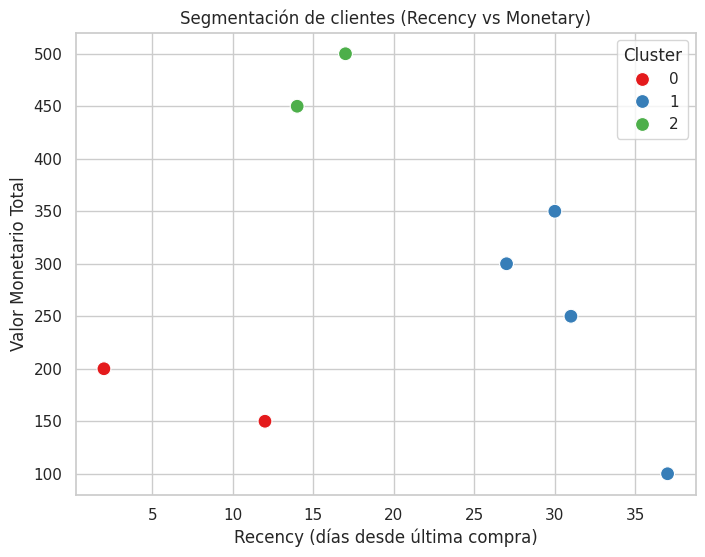

In [5]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=rfm, x='Recency', y='Monetary', hue='Cluster', palette='Set1', s=100)
plt.title('Segmentación de clientes (Recency vs Monetary)')
plt.xlabel('Recency (días desde última compra)')
plt.ylabel('Valor Monetario Total')
plt.grid(True)
plt.show()

## Paso 5: Recomendaciones de negocio

A partir del análisis, se pueden hacer recomendaciones como:

- **Cluster 0**: clientes con recencia alta → posibles clientes perdidos, útil lanzar campañas de reactivación.
- **Cluster 1**: clientes recientes pero de bajo valor → se sugiere fomentar compras repetidas.
- **Cluster 2**: clientes activos y de alto valor → mantener con beneficios y servicios personalizados.


## Conclusiones

Este ejercicio permite ilustrar cómo se pueden combinar métodos cuantitativos y técnicas de machine learning para segmentar clientes de manera estratégica. La metodología RFM, complementada con clustering, ofrece una herramienta poderosa para identificar patrones de comportamiento que puedan traducirse en acciones concretas de negocio. La práctica puede ser extendida a conjuntos de datos reales con mayor volumen y complejidad, y escalada para uso en producción en plataformas analíticas modernas.
